# Challenge 2: Zoom

### Group TD1:  Anjali Raveendran, Alice Archer, Ronan Devine, Mohammed Rubbani

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
df = pd.read_csv('ZM.csv', index_col='Date', parse_dates=True)


In [7]:
df= df.sort_index()

In [10]:
df.head()

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2019-09-03  91.500000  94.239998  90.750000  92.459999  92.459999  1538900   
2019-09-04  93.949997  96.000000  93.180000  93.529999  93.529999  2400700   
2019-09-05  94.239998  94.379997  88.510002  92.690002  92.690002  4991800   
2019-09-06  92.000000  96.500000  84.860001  85.410004  85.410004  7289700   
2019-09-09  85.750000  85.940002  77.199997  78.650002  78.650002  6713800   

            30d mavg  30d std  Upper Band  Lower Band  
Date                                                   
2019-09-03       NaN      NaN         NaN         NaN  
2019-09-04       NaN      NaN         NaN         NaN  
2019-09-05       NaN      NaN         NaN         NaN  
2019-09-06       NaN      NaN         NaN         NaN  
2019-09-09       NaN      NaN         NaN         NaN

In [8]:
df['30d mavg'] = df['Close'].rolling(window=30).mean()
df['30d std'] = df['Close'].rolling(window=30).std()

df['Upper Band'] = df['30d mavg'] + (df['30d std'] * 2)
df['Lower Band'] = df['30d mavg'] - (df['30d std'] * 2)

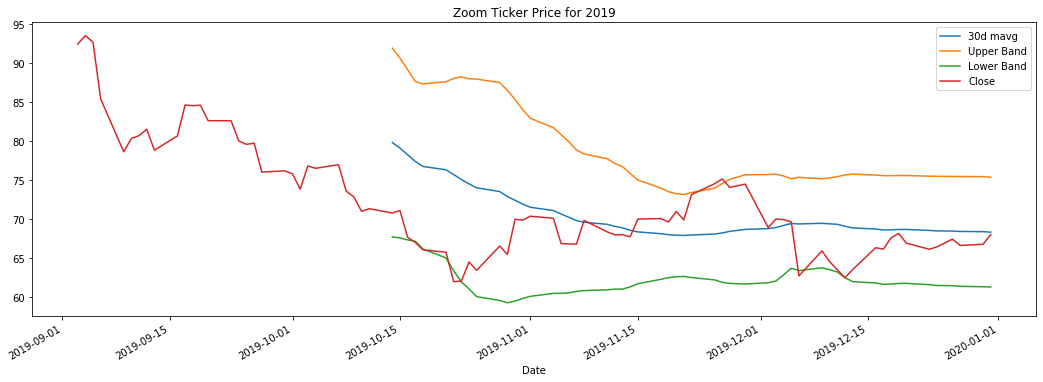

In [9]:
cols = ['30d mavg','Upper Band','Lower Band', 'Close']
        
df_Boll = df[cols]['2019']
df_Boll.plot(figsize=(18,6), title="Zoom Ticker Price for 2019")

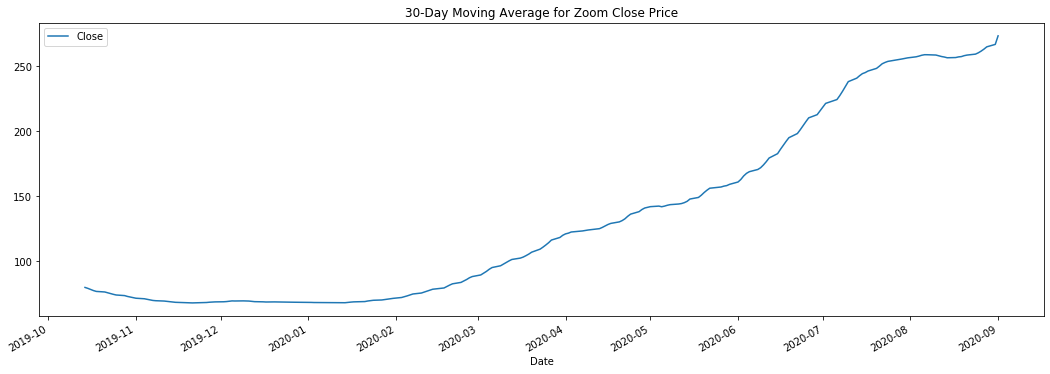

In [15]:
df['30d mavg'] = df['Close'].rolling(window=30).mean().plot(figsize=(18,6), legend=True, title="30-Day Moving Average for Zoom Close Price")

In [18]:
df['Close-Open'] = df['Close'] - df['Open']

In [21]:
df.head()

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2019-09-03  91.500000  94.239998  90.750000  92.459999  92.459999  1538900   
2019-09-04  93.949997  96.000000  93.180000  93.529999  93.529999  2400700   
2019-09-05  94.239998  94.379997  88.510002  92.690002  92.690002  4991800   
2019-09-06  92.000000  96.500000  84.860001  85.410004  85.410004  7289700   
2019-09-09  85.750000  85.940002  77.199997  78.650002  78.650002  6713800   

                                     30d mavg  30d std  Upper Band  \
Date                                                                 
2019-09-03  AxesSubplot(0.125,0.2;0.775x0.68)      NaN         NaN   
2019-09-04  AxesSubplot(0.125,0.2;0.775x0.68)      NaN         NaN   
2019-09-05  AxesSubplot(0.125,0.2;0.775x0.68)      NaN         NaN   
2019-09-06  AxesSubplot(0.125,0.2;0.775x0.68)      NaN         NaN   
2019-09-09  AxesSubplot(0.125,0.2;0.775x0.68)      NaN         NaN   

            Lower Band  Close-Open  
Date                                
2019-09-03         NaN    0.959999  
2019-09-04         NaN   -0.419998  
2019-09-05         NaN   -1.549996  
2019-09-06         NaN   -6.589996  
2019-09-09         NaN   -7.099998

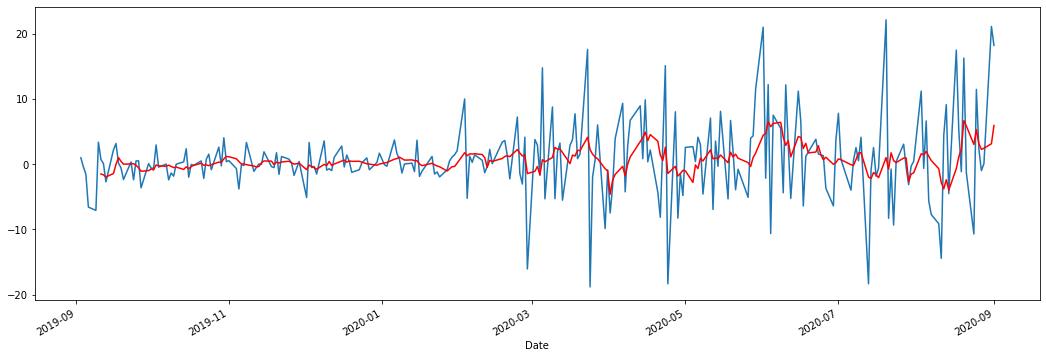

In [49]:
df['Close-Open'].plot(figsize=(18,6))
df['7d mavg'] = df['Close-Open'].rolling(window=7).mean().plot(figsize=(18,6), color="r")
#df['Volume'].resample('m').mean().plot(kind="bar", alpha=0.3, figsize=(18,6), color="g")

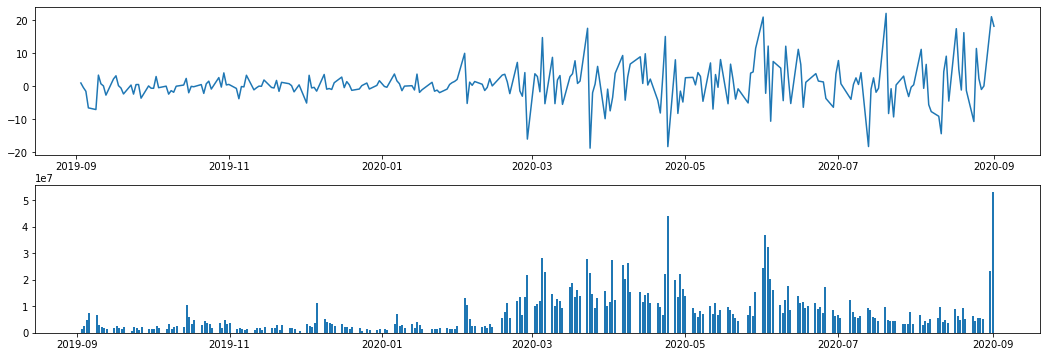

In [67]:
fig, axs = plt.subplots(2, 1, figsize=(18,6))

axs[0].plot(df.index, df['Close-Open'])
axs[1].bar(df.index, df['Volume'] )

plt.show()

In [69]:
MSFT_df = pd.read_csv("MSFT.csv", index_col = "Date", parse_dates =True)

In [70]:
MSFT_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-09-03  136.610001  137.199997  135.699997  136.039993  134.508682   
2019-09-04  137.300003  137.690002  136.479996  137.630005  136.080795   
2019-09-05  139.110001  140.380005  138.759995  140.050003  138.473541   
2019-09-06  140.029999  140.179993  138.199997  139.100006  137.534241   
2019-09-09  139.589996  139.750000  136.460007  137.520004  135.972031   

              Volume  
Date                  
2019-09-03  18869300  
2019-09-04  17995900  
2019-09-05  26101800  
2019-09-06  20824500  
2019-09-09  25773900

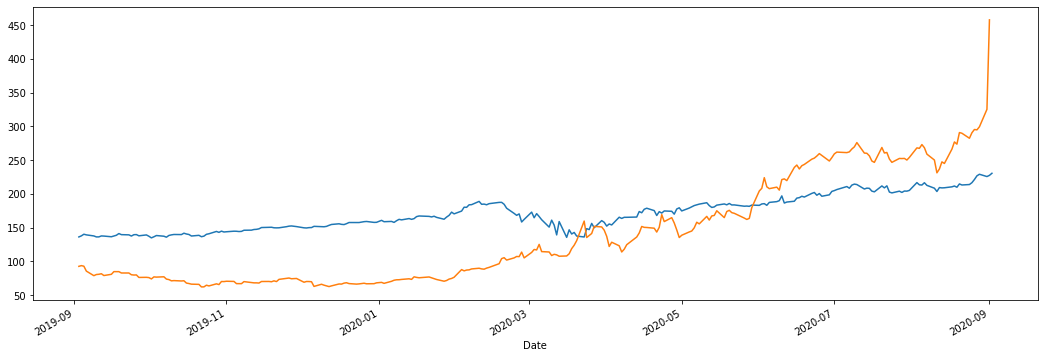

In [72]:
MSFT_df['Close'].plot(figsize=(18,6))
df['Close'].plot(figsize=(18,6))

In [88]:
msft_vol = MSFT_df['Volume'].resample("m").mean()
zoom_vol = df['Volume'].resample("m").mean()

msft_zoom = pd.concat(MSFT_df['Volume'], df['Volume'] )

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"